<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pokemon_data = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv")
pokemon_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

Text(0.5, 1.0, 'Positive Correlations between Attack and Defense, but not for HP')

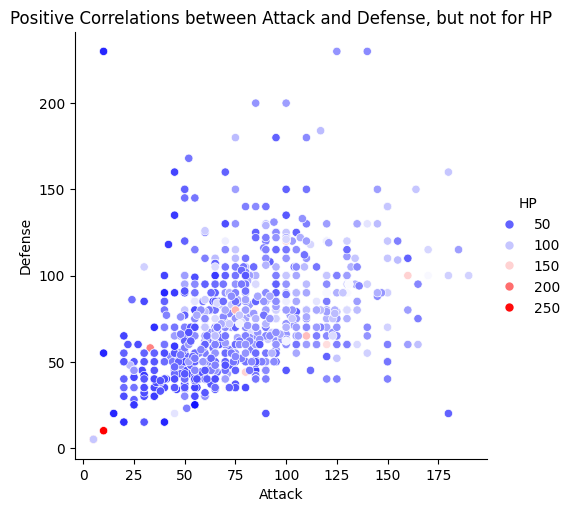

In [4]:
sns.relplot(data = pokemon_data,
            x = 'Attack',
            y = 'Defense',
            hue = 'HP',
            palette = 'bwr')
plt.title('Positive Correlations between Attack and Defense, but not for HP')

From the plot, I observed that pokemons tend to have a positive correlation between their attack and defense stats, but their HP stats look not as corrlated. From a first glance, HP and the other stats seem to be unrelated, but a closer look shows that most HP falls with the 50-100 range and from we can see a weak positive correlation with both stat, albeit much weaker and overshadowed the relationship shown between attack and defense.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

Text(0.5, 1.0, 'Attack vs total for all Pokemon')

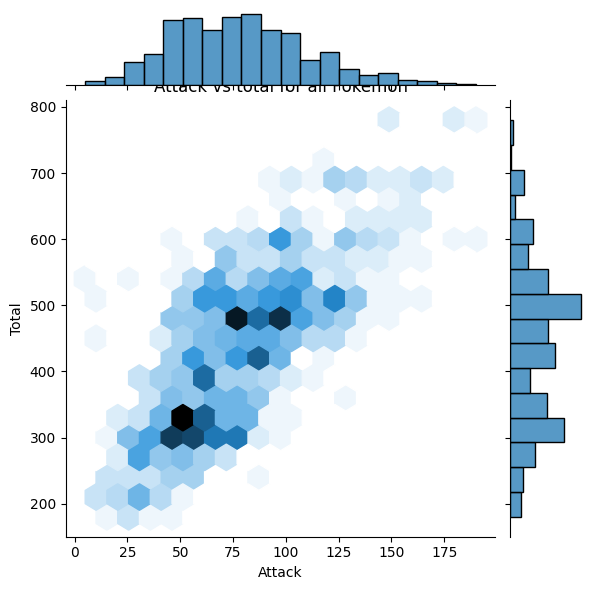

In [6]:
sns.jointplot(data = pokemon_data,
              x = 'Attack',
              y = 'Total',
              kind = 'hex')
plt.title('Attack vs total for all Pokemon')

From the plot, I observed that as attack increased, so did total stats as expected. I also observed that both attack and total stats had a bimodal distribution along their correlation, suggesting a baseline number for theoretical "tiers" of pokemon based off of stats (Maybe legendary and non-legendary).

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

Text(0.5, 1.0, 'Type 2 Pokemon')

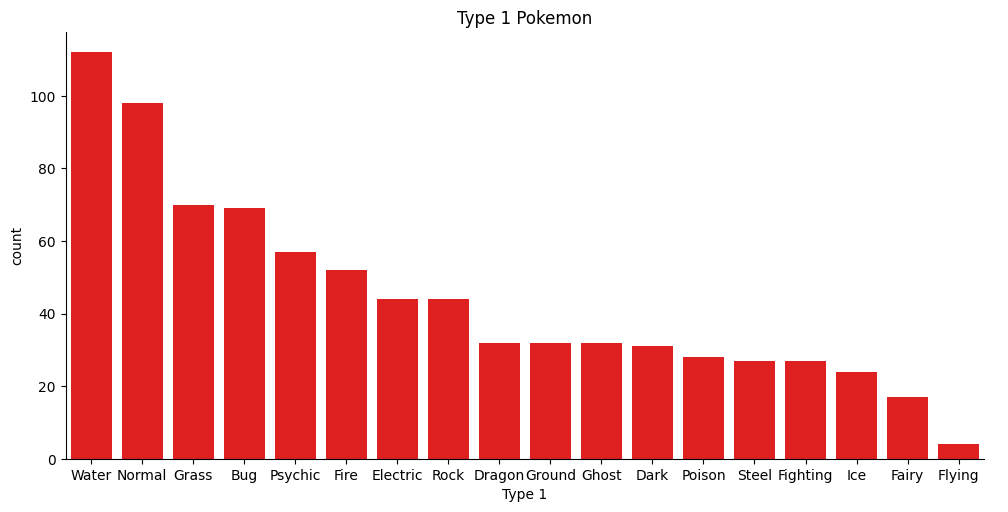

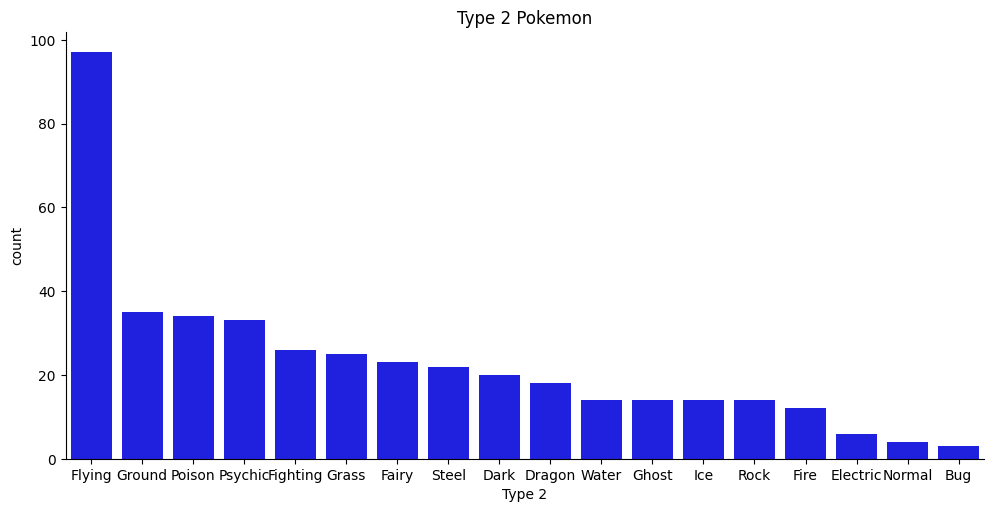

In [ ]:
type_1 = pokemon_data['Type 1'].value_counts().reset_index()
type_2 = pokemon_data['Type 2'].value_counts().reset_index()

sns.catplot(data = type_1,
            x = 'Type 1',
            y = 'count',
            kind = 'bar',
            aspect = 2,
            color = 'red')
plt.title("Type 1 Pokemon")

sns.catplot(data = type_2,
            x = 'Type 2',
            y = 'count',
            kind = 'bar',
            aspect = 2,
            color = 'blue')
plt.title("Type 2 Pokemon")


### Ans:
From the data, we can see that the most common type 1 among pokemon is the water type and the most common type 2 among pokemon is the flying type. The rarest/least common type 1 in pokemon are the ice, fairy, and flying types and the rarest/least common type 2 in pokemon are the electric, normal, and bug types.